In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 7

from importlib import reload

import time_series

time_series = reload(time_series)

import warnings
warnings.filterwarnings('ignore')

### Get the data

In [22]:
time_series_data = time_series.extrant_time_series_data()

In [23]:
england, temp = time_series_data[0]
price_data = time_series_data[1]
monthly_wage, wage = time_series_data[2]
energy_cons, cons = time_series_data[3]

### Plot the times serieses.

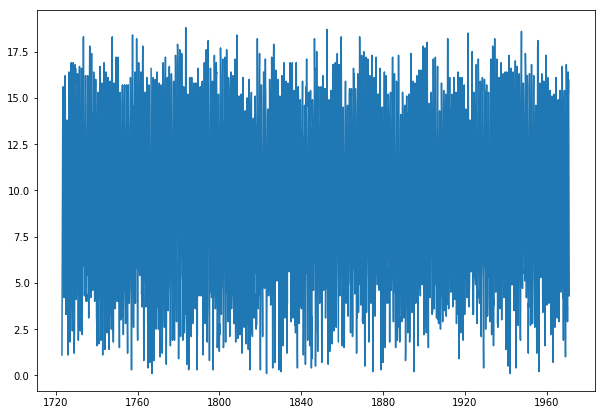

In [24]:
plt.plot(england.Month, temp);

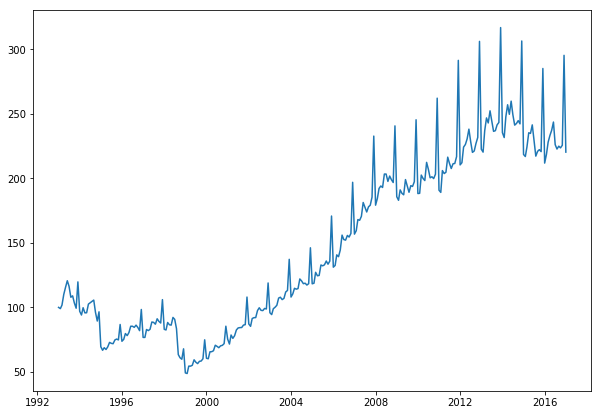

In [25]:
plt.plot(monthly_wage.Month, wage);

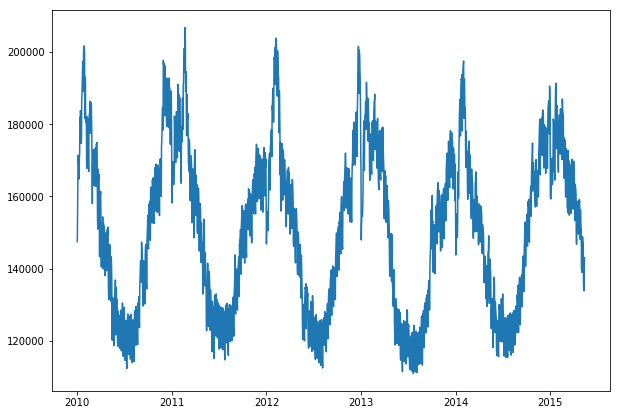

In [26]:
plt.plot(energy_cons.Date, cons);

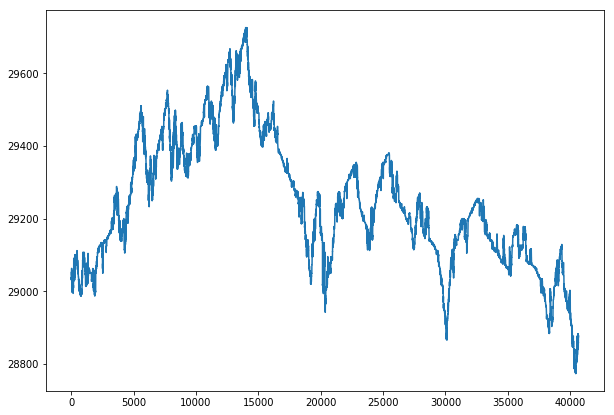

In [27]:
plt.plot(price_data.price);

## Smoothing

Simple Exponential Smoothing

In [258]:
def simple_smooth(time_series, alpha):
    assert 0 < alpha < 1
    
    p_sum = time_series[0]
    for datum in time_series:
        p_sum = alpha * datum + (1 - alpha) * p_sum
        yield p_sum

In [328]:
smoothed = np.array(list(simple_smooth(cons, 0.04)))

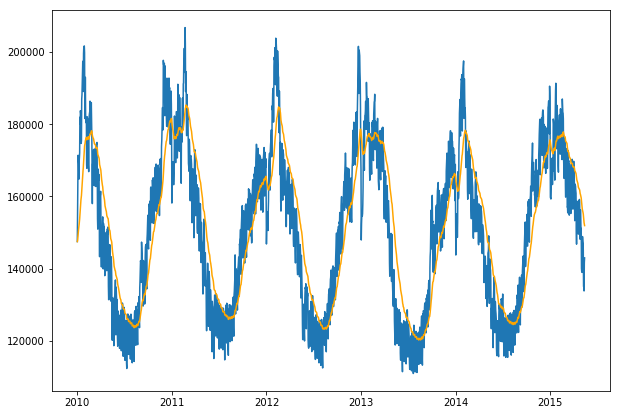

In [329]:
plt.plot(energy_cons.Date, cons);
plt.plot(energy_cons.Date, smoothed, color='orange')
plt.show()

Linear Trend

In [400]:
def linear_trend(time_series, alpha, beta):
    assert 0 < alpha < 1
    assert 0 < beta < 1
    
    l, b = 0, 0
    for i, datum in enumerate(time_series):
        prev_l = l
        l = alpha * datum + (1 - alpha) * (l + b)
        b = beta * (l - prev_l) + (1 - beta) * b
        yield l + b * i

In [401]:
smoothed = np.array(list(linear_trend(cons, 0.1, 0.000001)))

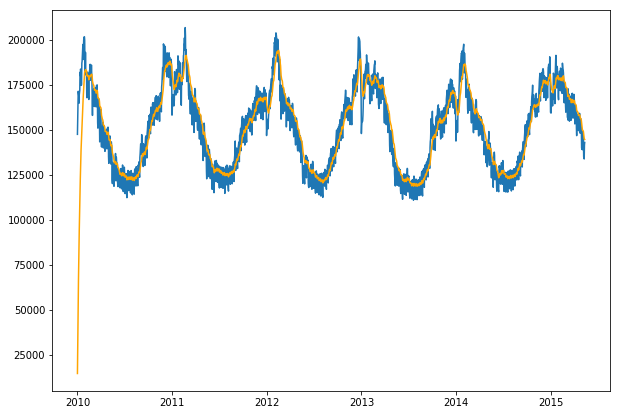

In [402]:
plt.plot(energy_cons.Date, cons);
plt.plot(energy_cons.Date, smoothed, color='orange')
plt.show()

Additive seasonality with period of length **P**

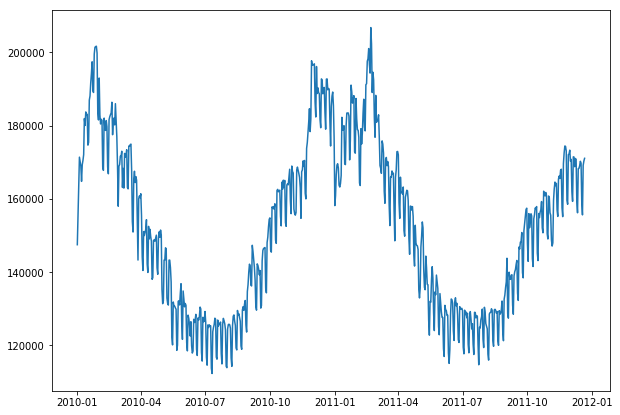

In [461]:
plt.plot(energy_cons.Date[:720], cons[:720]);

In [509]:
def additive_seasonality(time_series, alpha, gamma):
    assert 0 < alpha < 1
    assert 0 < gamma < 1
    
    smoothing_data = np.arange(0, 720 / 2)
    data = np.arange(720 / 2, 720)

    l, s = 0, 0
    for d_i, s_i in zip(data, smoothing_data):
        l = (1 - alpha) * l + alpha * (time_series[d_i] / time_series[s_i])
        s = gamma * (time_series[d_i] / l) + (1 - gamma) * time_series[s_i]
        yield l + s

In [517]:
smoothed = np.array(list(additive_seasonality(cons, 0.4, 0.7)))
smoothed.shape

(360,)

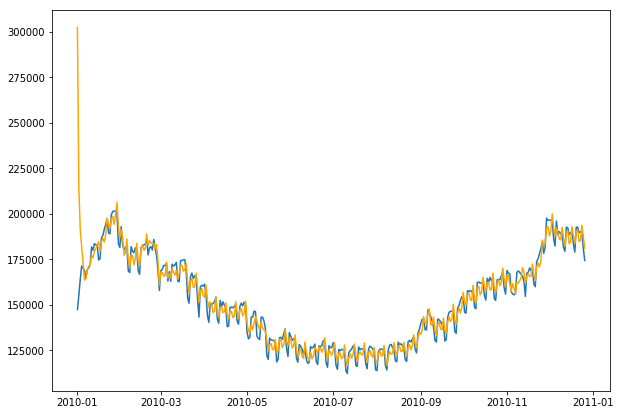

In [518]:
plt.plot(energy_cons.Date[:360], cons[:360])
plt.plot(energy_cons.Date[:360], smoothed, color='orange')
plt.show()

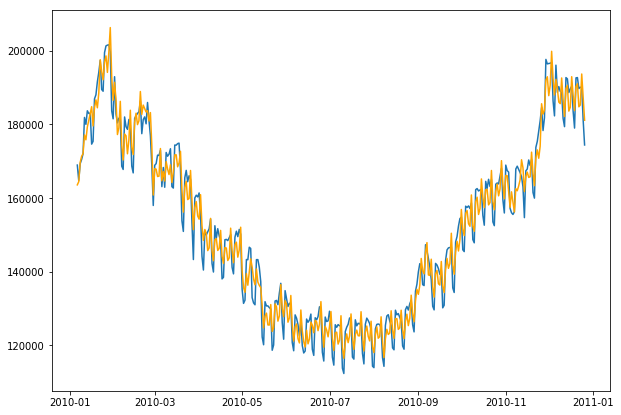

In [519]:
plt.plot(energy_cons.Date[5:360], cons[5:360])
plt.plot(energy_cons.Date[5:360], smoothed[5:], color='orange')
plt.show()

Grid search for best *alpha* and *gamma*

In [559]:
from itertools import product

# can be much many
params_size = 4

alphas = np.linspace(0, 1, params_size)[1:-1]
gammas = np.linspace(0, 1, params_size)[1:-1]

list(product(alphas, gammas))

[(0.3333333333333333, 0.3333333333333333),
 (0.3333333333333333, 0.6666666666666666),
 (0.6666666666666666, 0.3333333333333333),
 (0.6666666666666666, 0.6666666666666666)]

In [560]:
smoothes = [np.array(list(additive_seasonality(cons, *params))) 
            for params in list(product(alphas, gammas))]

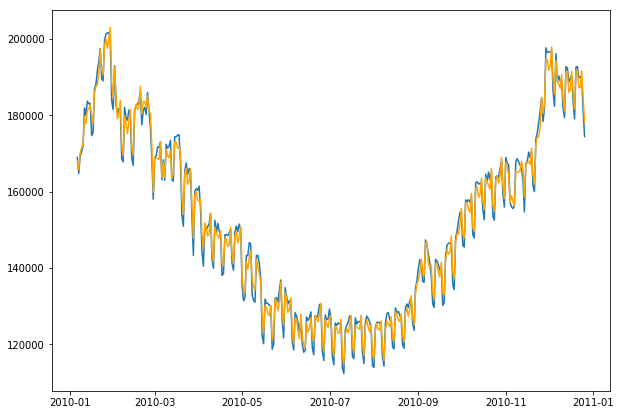

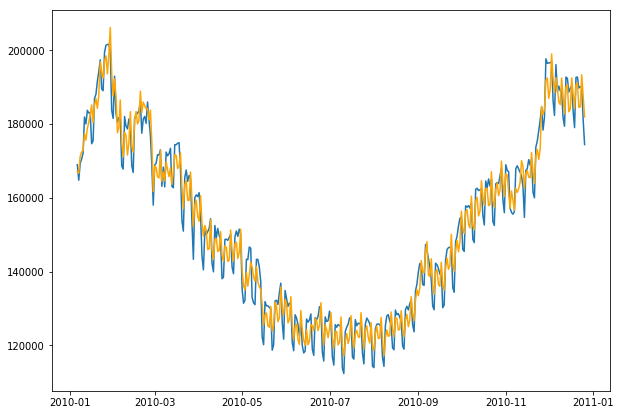

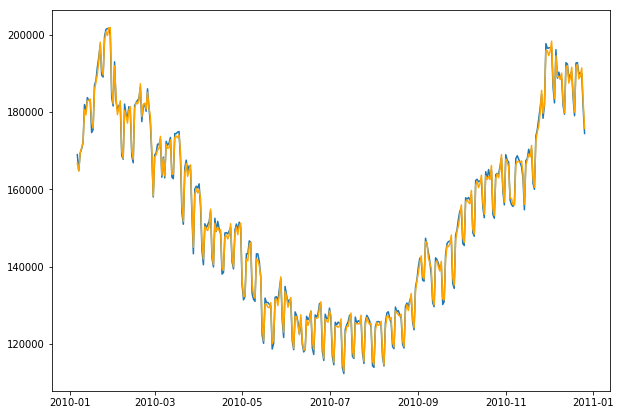

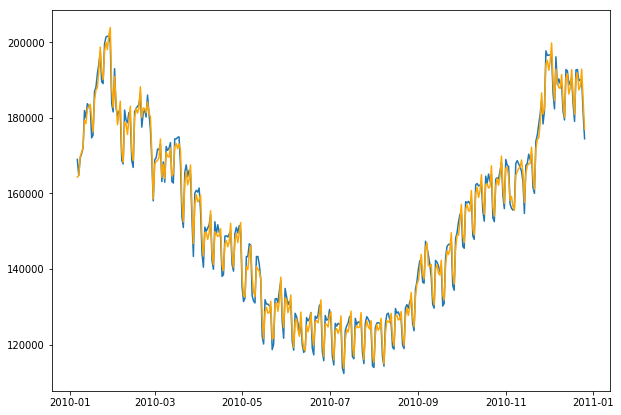

In [561]:
for smoothed in smoothes:
    plt.plot(energy_cons.Date[5:360], cons[5:360])
    plt.plot(energy_cons.Date[5:360], smoothed[5:], color='orange')
    plt.show()